In [2]:
import time
import os

In [3]:
from skimage import filters
# import skimage

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
image = cv2.imread("C:\\Users\\ack\\Documents\\Galaxy classification\\Images\\heic1317a_mini.jpg",1)

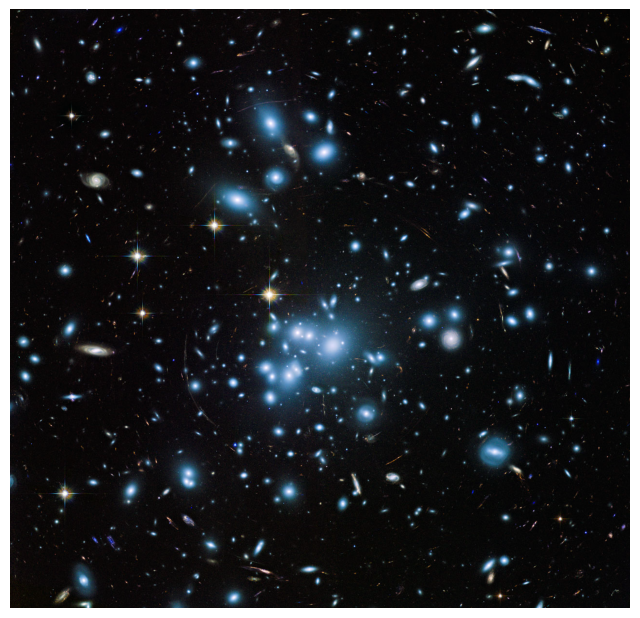

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

In [15]:
##https://towardsdatascience.com/image-segmentation-part-1-9f3db1ac1c50

In [16]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

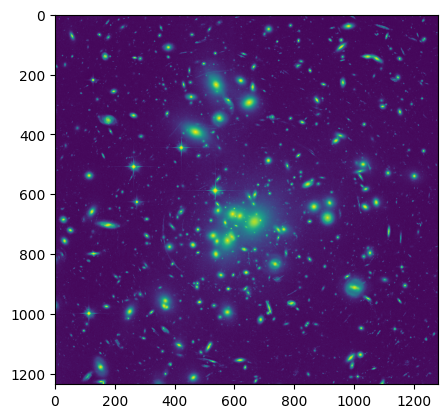

In [17]:
plt.imshow(grayscale)

In [18]:
thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [19]:
# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

In [20]:
# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [21]:
new_image = image.copy()

In [23]:
timestr = time.strftime("%Y%m%d-%H%M%S")
os.mkdir(r"C:\\Users\\ack\\Documents\\Galaxy classification\\{}_segemnted".format(timestr))

In [25]:
os.chdir(r"C:\\Users\\ack\\Documents\\Galaxy classification\\{}_segemnted".format(timestr))
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (255,255,255), 2)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
print(ROI_number)

218


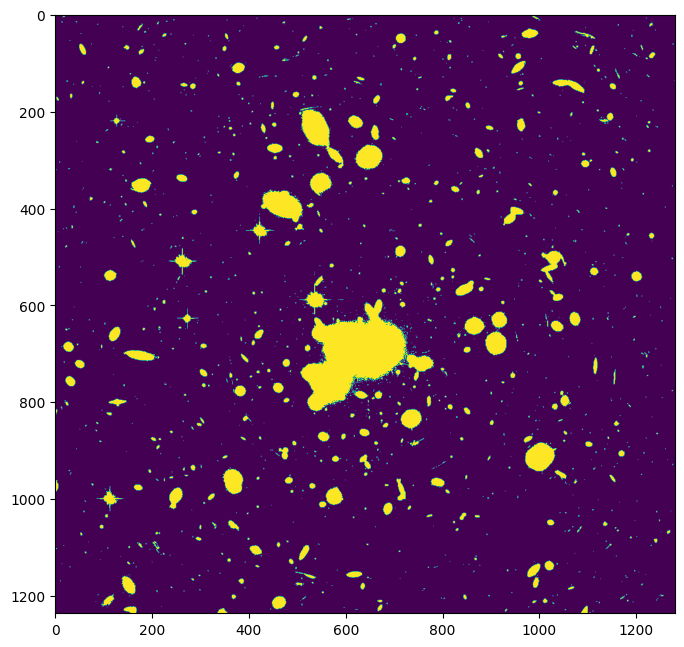

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(thresh)

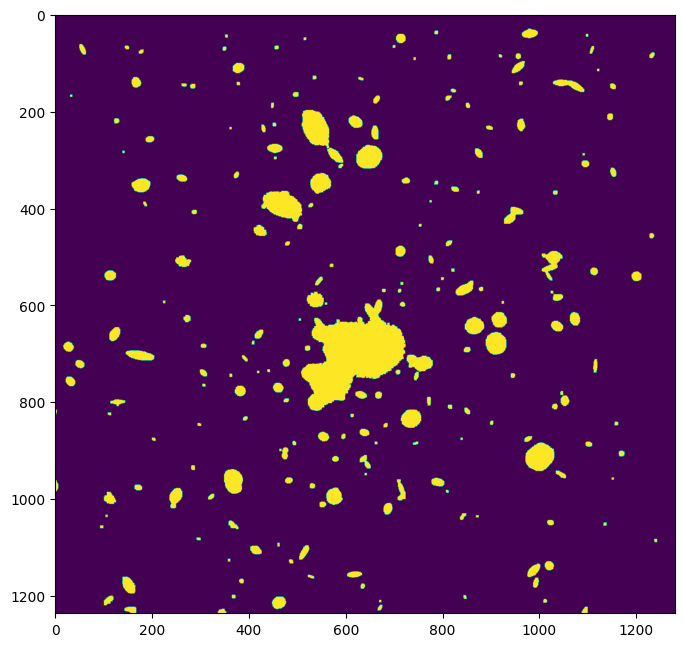

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(opening)

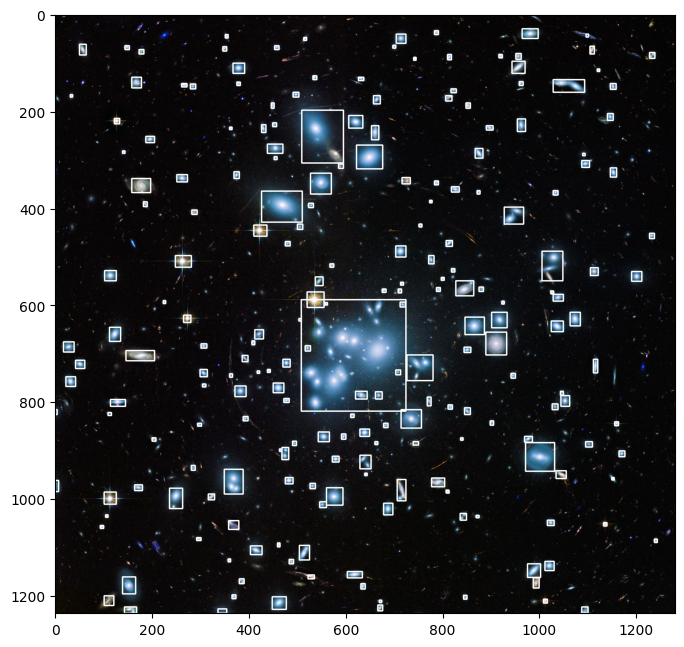

In [28]:
plt.figure(figsize=(8,8))
plt.imshow(new_image)